### PCA - Wine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine =load_wine()
wine_std =StandardScaler().fit_transform(wine.data)
wine_std.shape

(178, 13)

#### 1. 1차원 축소
    - 13 차원을 2,4,6 차원으로 축소

In [3]:
from sklearn.decomposition import PCA

- 2차원

In [5]:
pca2 =PCA(n_components=2)
wine_pca2=pca2.fit_transform(wine_std)
wine_pca2[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [6]:
pca2.explained_variance_ratio_,sum(pca2.explained_variance_ratio_)

(array([0.36198848, 0.1920749 ]), 0.554063383569353)

- 4차원

In [7]:
pca4 =PCA(n_components=4)
wine_pca4=pca4.fit_transform(wine_std)
wine_pca4[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231]])

In [8]:
pca4.explained_variance_ratio_,sum(pca4.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.7359899907589929)

- 6차원

In [9]:
pca6 =PCA(n_components=6)
wine_pca6=pca6.fit_transform(wine_std)
wine_pca6[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605]])

In [10]:
pca6.explained_variance_ratio_,sum(pca6.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]),
 0.8509811607477045)

#### 2. PCA 전후의 분류 비교

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [15]:
# 원본 데이터
X_train,X_test,y_train,y_test=train_test_split(
    wine.data,wine.target,stratify=wine.target,test_size=0.2,random_state=2023
)
rfc =RandomForestClassifier(random_state=2023)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [17]:
# 2개 차원으로 축소한 데이터
X_train,X_test,y_train,y_test=train_test_split(
    wine_pca2,wine.target,stratify=wine.target,test_size=0.2,random_state=2023
)
rfc =RandomForestClassifier(random_state=2023)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9722222222222222

In [18]:
# 4개 차원으로 축소한 데이터
X_train,X_test,y_train,y_test=train_test_split(
    wine_pca4,wine.target,stratify=wine.target,test_size=0.2,random_state=2023
)
rfc =RandomForestClassifier(random_state=2023)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9722222222222222

In [19]:
# 6개 차원으로 축소한 데이터
X_train,X_test,y_train,y_test=train_test_split(
    wine_pca6,wine.target,stratify=wine.target,test_size=0.2,random_state=2023
)
rfc =RandomForestClassifier(random_state=2023)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9722222222222222

#### 3. 시각화

In [20]:
df = pd.DataFrame(wine_pca2,columns=['PC1','PC2'])
df['target'] =wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


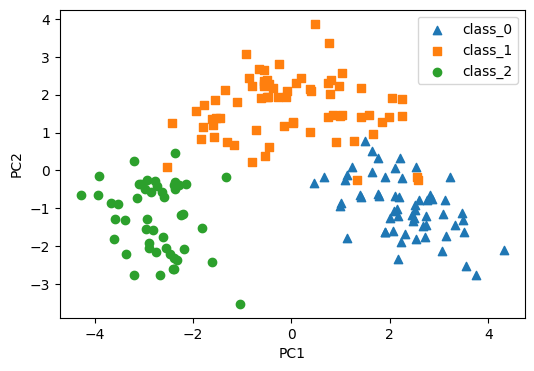

In [26]:
markers = ['^', 's', 'o']   # setisa, versicolor, verginica

plt.figure(figsize=(6,4))
for i , marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()

##### 4. code refactoring

In [27]:
def pca_accuracy(X,y):
    X_train,X_test,y_train,y_test=train_test_split(
    X,y,stratify=y,test_size=0.2,random_state=2023
    )
    rfc =RandomForestClassifier(random_state=2023)
    rfc.fit(X_train,y_train)
    score=rfc.score(X_test,y_test)
    return score

In [29]:
#2차원 4차원 6차원
for n in[2,4,6]:
    pca = PCA(n_components=n)
    wine_pca =pca.fit_transform(wine_std)
    expplaine =sum(pca.explained_variance_ratio_)
    acc =pca_accuracy(wine_pca,wine.target)
    print(f'PCA{n}:설명력-{expplaine:.4f},정확도-{acc:.4f}')

PCA2:설명력-0.5541,정확도-0.9722
PCA4:설명력-0.7360,정확도-0.9722
PCA6:설명력-0.8510,정확도-0.9722
